In [23]:
import pandas as pd
import tensorflow as tf
import re
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split

In [24]:
df = pd.read_excel("data training.xlsx")
df

,berita,sentiment
0,O-Ranger Mawar adalah terobosan terbaru untuk ...,POSITIF
1,ILUSTRASI. Dirut PT Pos Finansial Indonesia (P...,POSITIF
2,Logo PT Pos Indonesia\n \n TRIBUNNEWS.COM - PT...,POSITIF
3,"Liputan6.com, Jakarta Faizal Rachmad Djoemadi ...",POSITIF
4,Saat ini Pos Indonesia menyediakan pelayanan s...,POSITIF
...,...,...
76,"MATA INDONESIA, JAKARTA-Penyanyi senior Krisda...",2
77,SOLO – Kantor Pelayanan Pajak (KPP) Pratama Su...,2
78,"Perajin Usaha Mikro, Kecil dan Menengah (UMKM)...",3
79,Munculnya pandemi Covid-19 di Indonesia mempen...,2


In [25]:
df = df.replace({"POSITIF":3,"NEUTRAL":2,"NEGATIF":1})
df = df.replace({3:2,2:1,1:0})

In [26]:
df_neg = df[df['sentiment'] == 0]
df_net = df[df['sentiment'] == 1]
df_pos = df[df['sentiment'] == 2]
print(f"negatif shape {df_neg.shape}")
print(f"netral shape {df_net.shape}")
print(f"postif shape {df_pos.shape}")
print(f"total shape {df.shape}")

negatif shape (6, 2)
netral shape (22, 2)
postif shape (53, 2)
total shape (81, 2)


In [27]:
df['sentiment'] = df['sentiment'].astype(int)

df['berita'] = df['berita'].replace({'"':' ',
                                 '\d+':' ',
                                 ':':' ',
                                 ';':' ',
                                 '#':' ',
                                 '@':' ',
                                 '_':' ',
                                 ',': ' ',
                                 "'": ' ',
                                  }, regex=True)

df['berita'] = df['berita'].str.replace(r'[https]+[?://]+[^\s<>"]+|www\.[^\s<>"]+[?()]+[(??)]+[)*]+[(\xa0]+[-&gt...]', " ",regex=True)

df['berita'] = df['berita'].replace('\n',' ', regex=True)

df['berita'] = df['berita'].replace({'\.':' ','(/)':' ','\(':' ','\)':' ','\-':' ','\“':' ','\”':' ','\*':' ','\?':' '},regex=True)
df['berita'] = df['berita'].replace('[\.:"]',' ',regex =True)

df['berita'].astype(str)
letters_only = re.sub("[^a-zA-Z]",  # Search for all non-letters
                          " ",          # Replace all non-letters with spaces
                          str(df['berita']))
df['berita'] = df['berita'].str.strip()
df['berita'] = df['berita'].str.lower()
df['berita'] = df['berita'].replace('\s+', ' ', regex=True)

In [29]:
X = df["berita"]
y = df['sentiment']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

vocab_size = 20000
embedding_dim = 10
max_length = 150
trunc_type = 'post'
padding_type = 'post'
oov_tok = "<OOV>"

In [ ]:
import numpy as np
tokenizer = Tokenizer(num_words=vocab_size,oov_token=oov_tok)
tokenizer.fit_on_texts(X)

word_index =tokenizer.word_index

training_sequence = tokenizer.texts_to_sequences(X_train)
testing_sequence = tokenizer.texts_to_sequences(X_test)

training_padding = pad_sequences(training_sequence,maxlen=max_length,padding=padding_type)
test_padding = pad_sequences(training_sequence,maxlen=max_length,padding=padding_type)

training_padded = np.array(training_padding)
training_label = np.array(y_train)

test_padded = np.array(test_padding)
test_label = np.array(y_test)

In [32]:
X_train.shape

(64,)

In [30]:
vocab_size = 50000
embedding_dim = 40
max_length = 500
trunc_type = 'post'
padding_type = 'post'
oov_tok = "<OOV>"

In [33]:
import numpy as np
tokenizer = Tokenizer(num_words=vocab_size,oov_token=oov_tok)
tokenizer.fit_on_texts(X)

word_index =tokenizer.word_index

training_sequence = tokenizer.texts_to_sequences(X_train)
testing_sequence = tokenizer.texts_to_sequences(X_test)

training_padding = pad_sequences(training_sequence,maxlen=max_length,padding=padding_type)
test_padding = pad_sequences(training_sequence,maxlen=max_length,padding=padding_type)

training_padded = np.array(training_padding)
training_label = np.array(y_train)

test_padded = np.array(test_padding)
test_label = np.array(y_test)


In [34]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import LSTM,Dropout,Dense,Embedding


In [37]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size,embedding_dim,input_length=max_length ),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(150,activation='sigmoid'),
    tf.keras.layers.Dense(50,activation='sigmoid'),
    tf.keras.layers.Dense(10,activation='sigmoid'),
    tf.keras.layers.Dense(3,activation='sigmoid')

])
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [38]:
model.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 500, 30)           1500000   
                                                                 
 global_average_pooling1d (G  (None, 30)               0         
 lobalAveragePooling1D)                                          
                                                                 
 dense (Dense)               (None, 150)               4650      
                                                                 
 dense_1 (Dense)             (None, 50)                7550      
                                                                 
 dense_2 (Dense)             (None, 10)                510       
                                                                 
 dense_3 (Dense)             (None, 3)                 33        
                                                      

In [39]:
num_epoch = 500
history = model.fit(training_padded,training_label,batch_size = 32,epochs=num_epoch)


Epoch 1/500
2/2 [==============================] - 0s 12ms/step - loss: 1.3650 - accuracy: 0.0781
Epoch 2/500
2/2 [==============================] - 0s 11ms/step - loss: 1.2993 - accuracy: 0.0781
Epoch 3/500
2/2 [==============================] - 0s 11ms/step - loss: 1.2419 - accuracy: 0.0781
Epoch 4/500
2/2 [==============================] - 0s 10ms/step - loss: 1.1879 - accuracy: 0.0781
Epoch 5/500
2/2 [==============================] - 0s 10ms/step - loss: 1.1437 - accuracy: 0.0781
Epoch 6/500
2/2 [==============================] - 0s 11ms/step - loss: 1.1042 - accuracy: 0.0781

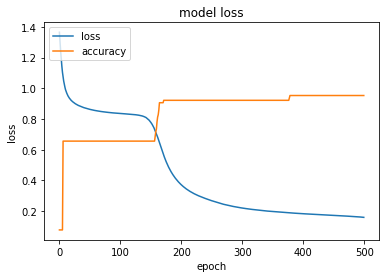

In [40]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['accuracy'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['loss', 'accuracy'], loc='upper left')
plt.show()



In [41]:
model.save('model news.h5')